In [52]:
# Importing all the necessary libraries

import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import numpy as np
import pandas as pd
import openpyxl
from openpyxl.drawing.image import Image

# Q1. Convert 10 pdfs to excel files using selenium. 

In [2]:
# Reasing all the pdf files available in the path as specified in the code below 

dirListing = os.listdir(r'C:\\Users\\user\\Desktop\\WorkShop\\Web Scraping\\pdfs for selenium')
pdfs = []
for item in dirListing:
    if ".pdf" in item:
        pdfs.append(item)

In [3]:
# Displaying all the pds'f taken to work with

pdfs

['2016_17_H1_2016_17_H1_Form_NL_3.pdf',
 '2016_17_H1_2016_17_H1_Form_NL_4.pdf',
 '2016_17_H1_2016_17_H1_Form_NL_5.pdf',
 '2016_17_H1_2016_17_H1_Form_NL_6.pdf',
 '2016_17_H1_Form_NL_1.pdf',
 '2016_17_H1_Form_NL_10.pdf',
 '2016_17_H1_Form_NL_2.pdf',
 '2016_17_H1_Form_NL_7.pdf',
 '2016_17_H1_Form_NL_8.pdf',
 '2016_17_H1_Form_NL_9.pdf']

In [4]:
profile = webdriver.FirefoxProfile()
profile.set_preference('browser.download.folderList', 2)
profile.set_preference('browser.download.manager.showWhenStarting', False)
profile.set_preference('browser.download.dir', 'C:\\Users\\user\\Desktop\\WorkShop\\Web Scraping\\pdfs for selenium\\converted')
profile.set_preference('browser.helperApps.neverAsk.saveToDisk','application/x-gzip')

driver = webdriver.Firefox(firefox_profile = profile, executable_path = r'C:\\Users\\user\\Desktop\\WorkShop\\Web Scraping\\geckodriver.exe')

<ipython-input-4-49003d480282>:1: DeprecationWarning: firefox_profile has been deprecated, please use an Options object
  profile = webdriver.FirefoxProfile()
<ipython-input-4-49003d480282>:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(firefox_profile = profile, executable_path = r'C:\\Users\\user\\Desktop\\WorkShop\\Web Scraping\\geckodriver.exe')
<ipython-input-4-49003d480282>:7: DeprecationWarning: firefox_profile has been deprecated, please pass in an Options object
  driver = webdriver.Firefox(firefox_profile = profile, executable_path = r'C:\\Users\\user\\Desktop\\WorkShop\\Web Scraping\\geckodriver.exe')


In [5]:
for i in range(len(pdfs)):
    item = pdfs[i]
    driver.get("https://www.pdftoexcel.com/")  
    
    w = WebDriverWait(driver, 40)
    w.until(EC.presence_of_element_located((By.NAME, 'Filedata')))
    inputElement = driver.find_element_by_name("Filedata")
    inputElement.send_keys("C:\\Users\\user\\Desktop\\WorkShop\\Web Scraping\\pdfs for selenium\\" + item)
    element = WebDriverWait(driver, 500).until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT, "Free")))
    element.click()
    print(i)

<ipython-input-5-e0dfc1e0bc1c>:7: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  inputElement = driver.find_element_by_name("Filedata")


0
1
2
3
4
5
6
7
8
9


# Q2. Create an excel file, create 4 sheets ( Red, Blue, Green, Yellow), print the i*j values for all the cells in 'Red' Sheet, Insert a picture of your choice in 'Blue', Merge few cells in 'Green' Sheet and insert the 'sum' formula in 'Yellow' Sheet.

In [25]:
# I've created an excel file named 'Week2_Project.xlsx' in the path as specified below
# The file has 10 rows and 3 columns
wb = openpyxl.load_workbook('C:\\Users\\user\\Desktop\\WorkShop\\Week2_Project\\ProjectWeek2.xlsx')

In [26]:
# Creating the four sheets as required with the names as specified below
ws_red = wb.create_sheet('Red')
ws_blue = wb.create_sheet('Blue')
ws_green = wb.create_sheet('Green')
ws_yellow = wb.create_sheet('Yellow')

In [27]:
wb.sheetnames

['Sheet1', 'Red', 'Blue', 'Green', 'Yellow']

## Printing the i x j values for all the cells in 'Red' Sheet.

In [28]:
# So I'm filling the first 100 rows as well as first 100 columns of the 'Red' sheets
# The cell(i,j) contains value i * j
for i in range(1,101):
    for j in range(1,101):
        ws_red.cell(i,j).value = i * j

## Inserting a picture of our choice in 'Blue' Sheet.

In [29]:
Blue = wb["Blue"]

In [30]:
img = Image('C:\\Users\\user\\Desktop\\WorkShop\\OPenPyXL\\th.jpg')
img.height = 150
img.width = 200

Blue.add_image(img,'H1')

## Merging few cells in 'Green' Sheet as specified below.

In [31]:
Green = wb["Green"]
Green.merge_cells('J1:K9')

In [32]:
Green['J1'] = 'Merged'

## Inserting the 'sum' formula in 'Yellow' Sheet.

In [33]:
# In order to insert the sum formula the 'Blue' sheet has been populated for rows 1 -> 4 and column 1
# The sum formulas has been used for rows 1 -> 4 and the result has been placed in the 5th row
# The required code is as follows
Yellow = wb["Yellow"]

In [34]:
Yellow["A5"] = '=SUM(A1:A4)'

In [35]:
wb.save('C:\\Users\\user\\Desktop\\WorkShop\\Week2_Project\\ProjectWeek2.xlsx')

# Q3. Do the basic text analysis using nltk for the inagural talks of any 3 presidents of USA.

In [53]:
import nltk

In [54]:
nltk.download("inaugural")
from nltk.corpus import inaugural
import string

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [55]:
names = inaugural.fileids()

In [56]:
names

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [57]:
print(len(names))

59


In [58]:
import matplotlib
import wordcloud

In [59]:
speech1 = inaugural.raw(fileids = names[43]) # Kennedy's Speech
speech2 = inaugural.raw(fileids = names[52]) # Hilary Clinton's Speech
speech3 = inaugural.raw(fileids = names[58]) # Joe Biden's Sppech

In [60]:
# Tokenizing the above speeches into words
words1 = inaugural.words(fileids = names[43])
words2 = inaugural.words(fileids = names[52])
words3 = inaugural.words(fileids = names[58])

In [61]:
# Getting the basic statistics regarding all the speeches above
# The statisctics that we are interested in are as follows :
# 1. Total number of Sentences
# 2. Total number of Characters ignoring the spaces
# 3. Total number of words in the speeches

# For John F. Kennedy's speech
import textstat 
print("Num sentences:", textstat.sentence_count(speech1)) 
print("Num chars:", textstat.char_count(speech1, ignore_spaces=True)) 
print("Num words:", len(speech1.split()))

Num sentences: 54
Num chars: 6202
Num words: 1390


In [62]:
# For Hillary Clinton's speech
print("Num sentences:", textstat.sentence_count(speech2)) 
print("Num chars:", textstat.char_count(speech2, ignore_spaces=True)) 
print("Num words:", len(speech2.split()))

Num sentences: 111
Num chars: 10012
Num words: 2170


In [63]:
# For Joe Biden's speech
print("Num sentences:", textstat.sentence_count(speech3)) 
print("Num chars:", textstat.char_count(speech3, ignore_spaces=True)) 
print("Num words:", len(speech3.split()))

Num sentences: 162
Num chars: 11388
Num words: 2535


In [64]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
# Now printing the frequency distribution of words in each of the speeches taken
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation) + ['--']
all_words1 = (w.lower() for w in words1)  
all_words_clean1 = [word for word in all_words1 if word not in stopwords] 
all_words_freq1 = nltk.FreqDist(all_words_clean1) 

  

nltk.FreqDist(all_words_clean1)

FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

In [66]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation) + ['--']
all_words2 = (w.lower() for w in words2)  
all_words_clean2 = [word for word in all_words2 if word not in stopwords] 
all_words_freq2 = nltk.FreqDist(all_words_clean2) 

  

nltk.FreqDist(all_words_clean2)

FreqDist({'new': 29, 'us': 27, 'century': 20, 'america': 15, 'world': 15, 'nation': 13, 'time': 12, 'land': 11, 'people': 11, 'every': 11, ...})

In [67]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation) + ['--' , '\x80\x94']
all_words3 = (w.lower() for w in words3)  
all_words_clean3 = [word for word in all_words3 if word not in stopwords] 
all_words_freq3 = nltk.FreqDist(all_words_clean3) 

  

nltk.FreqDist(all_words_clean3)

FreqDist({'us': 24, 'america': 20, 'one': 15, 'nation': 14, 'democracy': 11, 'americans': 10, 'today': 10, 'people': 10, 'much': 10, 'know': 9, ...})

In [71]:
import matplotlib.pyplot as plt 

  

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud

In [72]:
class WordCloudGeneration: 
    def preprocessing(self, data): 
        # convert all words to lowercase 
        data = [item.lower() for item in data] 
        # load the stop_words of english 
        stop_words = set(stopwords.words('english')) 
        # concatenate all the data with spaces. 
        paragraph = ' '.join(data) 
        # tokenize the paragraph using the inbuilt tokenizer 
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words]) 
        print("\n Preprocessed Data: " ,preprocessed_data) 
        return preprocessed_data 
    def create_word_cloud(self, final_data): 
        # initiate WordCloud object with parameters width, height, maximum font size and background color 
        # call the generate method of WordCloud class to generate an image 
        wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="black").generate(final_data) 
        # plt the image generated by WordCloud class 
        plt.figure(figsize=(12,10)) 
        plt.imshow(wordcloud) 
        plt.axis("off") 
        plt.show()

In [73]:
wordcloud_generator = WordCloudGeneration()

# WordCloud for Kennedy's Speech


 Preprocessed Data:  vice president johnson , mr . speaker , mr . chief justice , president eisenhower , vice president nixon , president truman , reverend clergy , fellow citizens , observe today victory party , celebration freedom -- symbolizing end , well beginning -- signifying renewal , well change . sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago . world different . man holds mortal hands power abolish forms human poverty forms human life . yet revolutionary beliefs forebears fought still issue around globe -- belief rights man come generosity state , hand god . dare forget today heirs first revolution . let word go forth time place , friend foe alike , torch passed new generation americans -- born century , tempered war , disciplined hard bitter peace , proud ancient heritage -- unwilling witness permit slow undoing human rights nation always committed , committed today home around world . let every nation know , whether wishes us well il

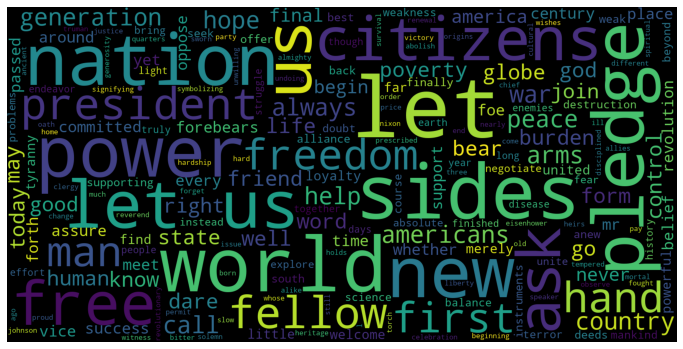

In [74]:
clean_data1 = wordcloud_generator.preprocessing(words1) 
wordcloud_generator.create_word_cloud(clean_data1)

# WordCloud for Clinton's Speech


 Preprocessed Data:  fellow citizens : last presidential inauguration 20th century , let us lift eyes toward challenges await us next century . great good fortune time chance put us edge new century , new millennium , edge bright new prospect human affairs -- moment define course , character , decades come . must keep old democracy forever young . guided ancient vision promised land , let us set sights upon land new promise . promise america born 18th century bold conviction created equal . extended preserved 19th century , nation spread across continent , saved union , abolished awful scourge slavery . , turmoil triumph , promise exploded onto world stage make american century . century . america became world ' mightiest industrial power ; saved world tyranny two world wars long cold war ; time , reached across globe millions , like us , longed blessings liberty . along way , americans produced great middle class security old age ; built unrivaled centers learning opened public schoo

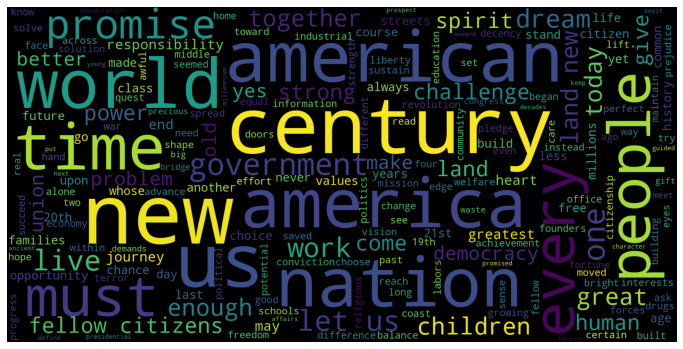

In [75]:
clean_data2 = wordcloud_generator.preprocessing(words2) 
wordcloud_generator.create_word_cloud(clean_data2)

# WordCloud for Biden's Speech


 Preprocessed Data:  chief justice roberts , vice president harris , speaker pelosi , leader schumer , leader mcconnell , vice president pence , distinguished guests , fellow americans : america ' day . democracy ' day , day history hope , renewal resolve . crucible ages america tested anew , america risen challenge . today celebrate triumph candidate , cause , cause democracy . peopleâ  people heard , people heeded . ' learned democracy precious , democracy fragile . hour , friends , democracy prevailed . , hallowed ground days ago violence sought shake capitol ' foundation , come together one nation god , indivisible , carry peaceful transfer power two centuries . look ahead uniquely american wayâ  restless , bold , optimisticâ  set sights nation know must , thank predecessors parties presence today . thank bottom heart . know resilience constitution strength , strength nation , president carter , spoke last night , us today , salute lifetime service . taken sacred oath patrio

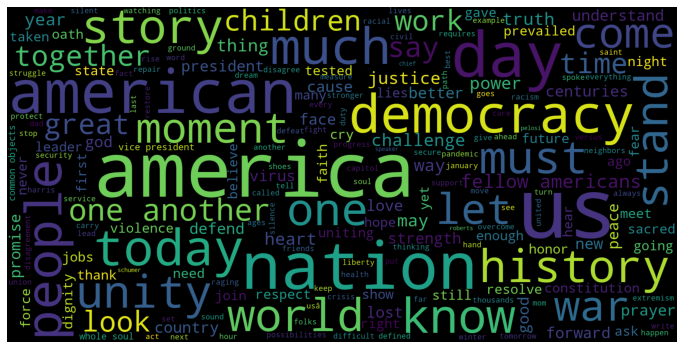

In [76]:
clean_data3 = wordcloud_generator.preprocessing(words3) 
wordcloud_generator.create_word_cloud(clean_data3)

# END